# Instacart Market Basket Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from time import time
from scipy import stats
from apyori import apriori
from collections import Counter
from itertools import combinations

from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
aisle = pd.read_csv("data/aisles.csv")
aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
departments = pd.read_csv("data/departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
orders = pd.read_csv("data/orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
products = pd.read_csv("data/products.csv")
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
order_products_prior = pd.read_csv("data/order_products__prior.csv")
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_products_train = pd.read_csv("data/order_products__train.csv")
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
order_products = pd.concat([order_products_prior, order_products_train])

order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
orders = pd.read_csv("data/orders.csv")

orders_test = orders[orders['eval_set'] == 'test']

In [10]:
df = pd.merge(orders, order_products, on='order_id')
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [11]:
products = pd.read_csv("data/products.csv")

combined_data = pd.merge(df, products, on='product_id')
combined_data = pd.merge(combined_data, aisle, on='aisle_id')
combined_data = pd.merge(combined_data, departments, on='department_id')
combined_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages


# EDA

Plot product counts by department

<AxesSubplot:>

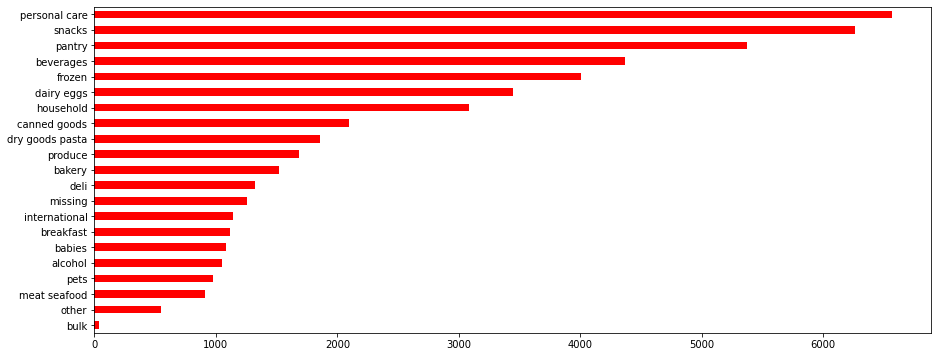

In [12]:
product_by_dept = pd.merge(left=products, right=departments, on='department_id')

plt.figure(figsize=(15,6))

product_by_dept['department'].value_counts().sort_values(ascending=True).plot(kind='barh',color='red')

In [13]:
# !pip install wordcloud

There are 1581702 words in the combination of all Product Name.


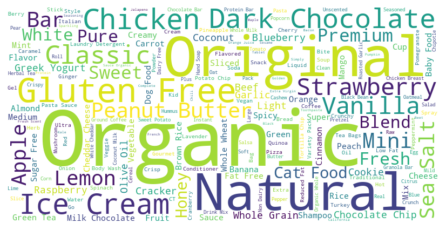

In [14]:
#making of word cloud from Product name column
text = " ".join(topic for topic in product_by_dept.product_name.astype(str))
print ("There are {} words in the combination of all Product Name.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,6)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

<AxesSubplot:xlabel='reordered', ylabel='count'>

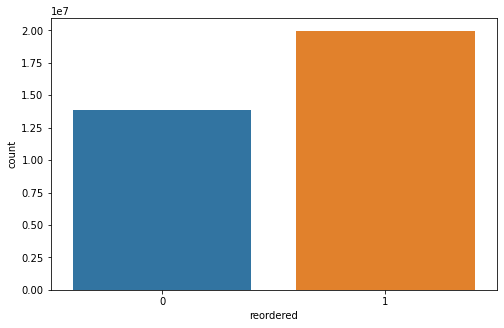

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='reordered',data=combined_data)

In [16]:
combined_data['days_since_prior_order'].dropna(inplace= True)

<AxesSubplot:>

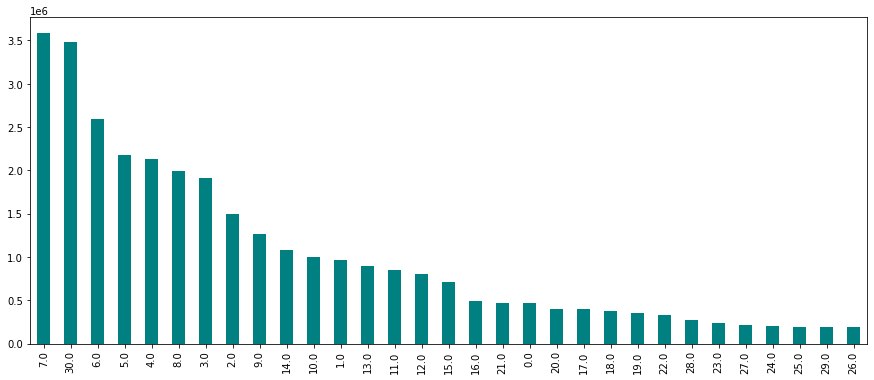

In [17]:
combined_data['days_since_prior_order'].value_counts().sort_values(ascending= False).plot(kind='bar',color='teal')

Plotting what percentage in an order is reorder and how much does it occupy in total order

In [18]:

def percent(x):
    return sum(x)/len(x)*100
order_products.groupby('order_id').agg({'reordered': percent})['reordered'].value_counts(normalize  = True).iloc[:5].iplot(kind = 'bar', 
                                                                             title = 'What Percentage of order is Reorder',
                                                                             xTitle = 'Percentage of reorder in paticular order %',
                                                                             yTitle = 'Percentage of Total order')

In [19]:
aisles_wise_product_add = combined_data.groupby(['reordered', 'aisle']).agg({'product_name' : 'count'}).reset_index()
aisles_wise_product_add = aisles_wise_product_add.pivot('aisle', 'reordered', 'product_name')
aisles_wise_product_add.sort_values(by = [1], axis = 0, ascending = False, inplace = True)
aisles_wise_product_add = aisles_wise_product_add / aisles_wise_product_add.sum() * 100
aisles_wise_product_add.iloc[:20,:].iplot(title = 'How many times were aisles\'s product reordered',
                                           xTitle = 'Top 20 aisles',
                                           yTitle = 'Percentage')

***Most reordered and least reordered product***

In [20]:
reorder_aisle = combined_data.groupby(['aisle', 'department'])['reordered'].mean().to_frame().reset_index()

reorder_aisle.sort_values('reordered', ascending=False)[:5]\
.append(pd.Series('...', index=reorder_aisle.columns), ignore_index=True)\
.append(reorder_aisle.sort_values('reordered', ascending=False)[-5:], ignore_index=True)

,aisle,department,reordered
0,milk,dairy eggs,0.781812
1,water seltzer sparkling water,beverages,0.72993
2,fresh fruits,produce,0.718823
3,eggs,dairy eggs,0.706359
4,soy lactosefree,dairy eggs,0.692361
5,...,...,...
6,beauty,personal care,0.212858
7,first aid,personal care,0.195864
8,kitchen supplies,household,0.194802
9,baking supplies decor,pantry,0.167595


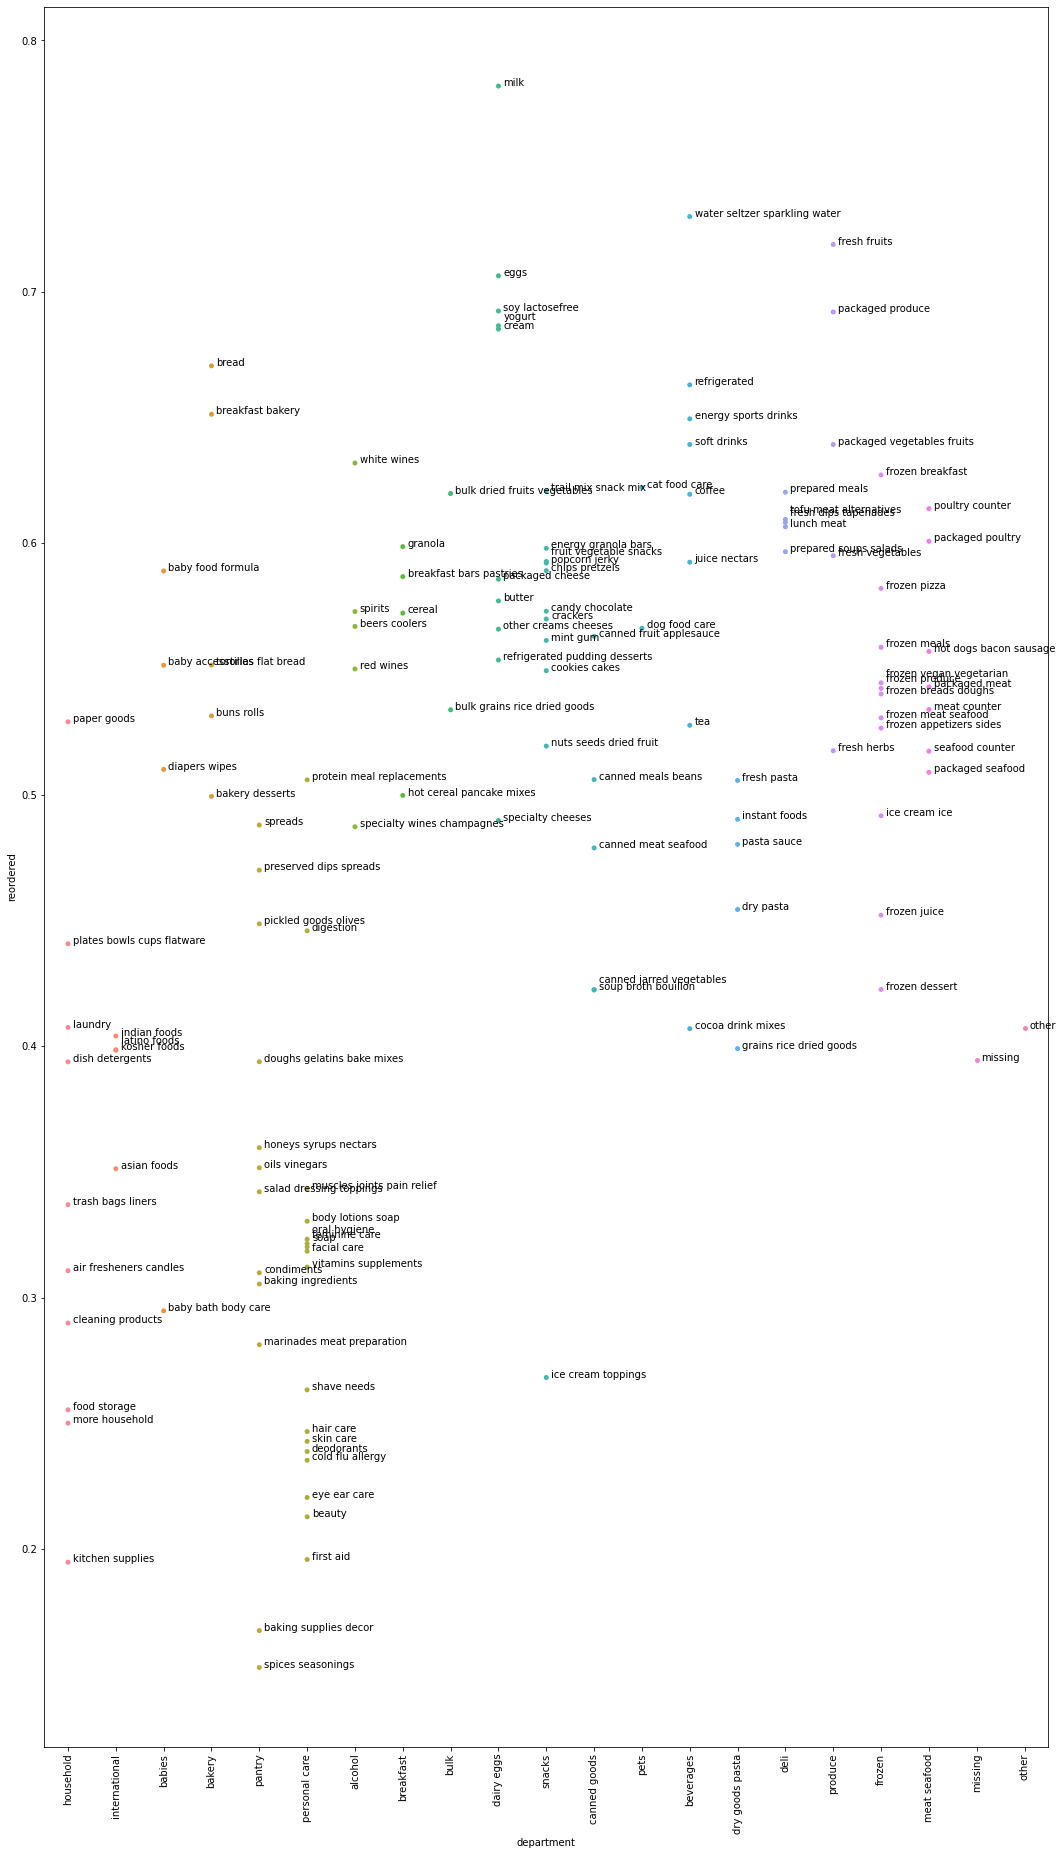

In [21]:

plt.figure(figsize=(18,32))

ax = sns.stripplot(x='department', y='reordered', data=reorder_aisle, jitter=False)

plt.xticks(rotation='vertical')

# Make a list of all department names with the same ordinal values as seaborn plot
dep_cat = reorder_aisle['department'].unique().tolist()

# Annotate with aisle names
for i in range(reorder_aisle.shape[0]):
    # Add some distance for overlapping annotations in the same category. More work necessary for multiple overlapping annotations.
    if (reorder_aisle[reorder_aisle['department'] == reorder_aisle['department'].iloc[i]]['reordered'] \
        - reorder_aisle['reordered'].iloc[i]).between(-0.0025, 0, inclusive=False).any(): 
        ax.annotate(reorder_aisle['aisle'].iloc[i],
                    xy=(dep_cat.index(reorder_aisle['department'].iloc[i]), reorder_aisle['reordered'].iloc[i]),
                    xytext=(dep_cat.index(reorder_aisle['department'].iloc[i])+0.1, reorder_aisle['reordered'].iloc[i]+0.0025))
    else:
        ax.annotate(reorder_aisle['aisle'].iloc[i],
                    xy=(dep_cat.index(reorder_aisle['department'].iloc[i]), reorder_aisle['reordered'].iloc[i]),
                    xytext=(dep_cat.index(reorder_aisle['department'].iloc[i])+0.1, reorder_aisle['reordered'].iloc[i]))

plt.show()

# Train and test data

In [22]:
order_products_pr = pd.merge(order_products_prior, orders, how="inner", on="order_id")

In [23]:

# get the products and reorder status of the latest purchase of each user #
prior_grouped_df = order_products_pr.groupby("user_id")["order_number"].aggregate("max").reset_index()
prior_df_latest = pd.merge(order_products_pr, prior_grouped_df, how="inner", on=["user_id", "order_number"])
prior_df_latest = prior_df_latest[["user_id", "product_id", "reordered"]]
prior_df_latest.columns = ["user_id", "product_id", "reordered_latest"]
prior_df_latest.head()

,user_id,product_id,reordered_latest
0,59897,9755,1
1,59897,31487,0
2,59897,37510,1
3,59897,14576,1
4,59897,22105,0


In [24]:

# get the count of each product and number of reorders by the customer #
prior_df_agg = order_products_pr.groupby(["user_id","product_id"])["reordered"].aggregate(["count", "sum"]).reset_index()
prior_df_agg.columns = ["user_id", "product_id", "reordered_count", "reordered_sum"]
prior_df_agg.head()

,user_id,product_id,reordered_count,reordered_sum
0,1,196,10,9
1,1,10258,9,8
2,1,10326,1,0
3,1,12427,10,9
4,1,13032,3,2


In [25]:
prior_df_merge = pd.merge(prior_df_agg, prior_df_latest, how="left", on=["user_id","product_id"])
prior_df_merge.head()

,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,1,196,10,9,1.0
1,1,10258,9,8,1.0
2,1,10326,1,0,NaN
3,1,12427,10,9,1.0
4,1,13032,3,2,1.0


In [26]:
orders = orders.drop(["order_number"],axis=1)

train_df = pd.read_csv("data/order_products__train.csv", usecols=["order_id"])

train_df.head()

,order_id
0,1
1,1
2,1
3,1
4,1


In [27]:
train_df = train_df.groupby("order_id").aggregate("count").reset_index()
train_df.head()

,order_id
0,1
1,36
2,38
3,96
4,98


In [28]:
train_df = pd.merge(train_df, orders, how="inner", on="order_id")

train_df = train_df.loc[:,["order_id", "user_id"]]
train_df.head()

,order_id,user_id
0,1,112108
1,36,79431
2,38,42756
3,96,17227
4,98,56463


In [32]:
test_df = pd.read_csv("data/sample_submission.csv", usecols=["order_id"])
test_df = pd.merge(test_df, orders, how="inner", on="order_id")
test_df = test_df.loc[:,["order_id", "user_id"]]
test_df.head()

,order_id,user_id
0,17,36855
1,34,35220
2,137,187107
3,182,115892
4,257,35581


In [33]:
train_df = pd.merge(train_df, prior_df_merge, how="inner", on="user_id")
train_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,1,112108,2067,1,0,NaN
1,1,112108,5707,2,1,1.0
2,1,112108,11109,2,1,NaN
3,1,112108,14947,3,2,1.0
4,1,112108,22035,2,1,NaN


In [34]:
test_df = pd.merge(test_df, prior_df_merge, how="inner", on="user_id")
test_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest
0,17,36855,1283,1,0,NaN
1,17,36855,6291,1,0,NaN
2,17,36855,7035,1,0,NaN
3,17,36855,11494,1,0,NaN
4,17,36855,13107,3,2,1.0


In [35]:
products = pd.read_csv("data/products.csv", usecols=["product_id", "aisle_id", "department_id"])

products.head()

,product_id,aisle_id,department_id
0,1,61,19
1,2,104,13
2,3,94,7
3,4,38,1
4,5,5,13


In [36]:
train_df = pd.merge(train_df, products, how="inner", on="product_id")
train_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id
0,1,112108,2067,1,0,NaN,3,19
1,96,17227,2067,1,0,NaN,3,19
2,3243,206024,2067,1,0,NaN,3,19
3,12950,11456,2067,1,0,0.0,3,19
4,17683,177724,2067,1,0,NaN,3,19


In [37]:
test_df = pd.merge(test_df, products, how="inner", on="product_id")
test_df.head()

,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id
0,17,36855,1283,1,0,NaN,100,21
1,657743,16994,1283,1,0,NaN,100,21
2,834223,92628,1283,1,0,NaN,100,21
3,1446886,75870,1283,1,0,NaN,100,21
4,1518981,118458,1283,3,2,NaN,100,21


In [38]:
train_y_df = pd.read_csv("data/order_products__train.csv", usecols=["order_id", "product_id", "reordered"])

train_y_df.head()

,order_id,product_id,reordered
0,1,49302,1
1,1,11109,1
2,1,10246,0
3,1,49683,0
4,1,43633,1


In [39]:
train_y_df = pd.merge(train_y_df, orders, how="inner", on="order_id")
train_y_df = train_y_df[["user_id", "product_id", "reordered"]]
train_df = pd.merge(train_df, train_y_df, how="left", on=["user_id", "product_id"])
train_df["reordered"].fillna(0, inplace=True)
print(train_df.shape)

(8474661, 9)


# Models

In [40]:

tr_data = train_df #i did this step so that I have the independence to do this -> tr_data = train_df.iloc[:10000,:]
print("shape of new train data: ",tr_data.shape)
X=tr_data.drop('reordered',axis=1)
X.head()

shape of new train data:  (8474661, 9)


,order_id,user_id,product_id,reordered_count,reordered_sum,reordered_latest,aisle_id,department_id
0,1,112108,2067,1,0,NaN,3,19
1,96,17227,2067,1,0,NaN,3,19
2,3243,206024,2067,1,0,NaN,3,19
3,12950,11456,2067,1,0,0.0,3,19
4,17683,177724,2067,1,0,NaN,3,19


In [41]:
Y = tr_data['reordered']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

In [43]:
X_train['reordered_latest'] = X_train['reordered_latest'].replace(np.nan, 0)
X_test['reordered_latest'] = X_test['reordered_latest'].replace(np.nan, 0)

In [44]:


clfrf = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, oob_score=True)

clfrf.fit(X_train, y_train)

#predictions
predrf = clfrf.predict(X_test)


#accuracy score for the random forest model
print("Accuracy using randomforest classifier: ",accuracy_score(predrf, y_test))

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:541: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/opt/homebrew/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning:

invalid value encountered in true_divide



Accuracy using randomforest classifier:  0.9045039420533004


# Association Rule mining

In [45]:
products = pd.read_csv("data/products.csv")
products_id_to_name = {k: v for k, v in zip(products.product_id, products.product_name)}

In [46]:
def association_rules(order_products, min_support, min_length = 2, max_length = 5, min_confidence = 0.2, min_lift = 1.0):
    
    print('Loading data...')
    transactions_df = order_products[['order_id', 'product_id']]

    print('Calculating product supports...')
    n_orders = len(set(transactions_df.order_id))
    product_frequency = transactions_df.product_id.value_counts()/n_orders
    products_apriori = product_frequency[product_frequency >= min_support]
    transactions_apriori = transactions_df[transactions_df.product_id.isin(products_apriori.index)]
    
    order_sizes = transactions_apriori.order_id.value_counts()
    orders_apriori = order_sizes[order_sizes >= min_length]
    transactions_apriori = transactions_apriori[transactions_apriori.order_id.isin(orders_apriori.index)]
    
    print('Calculating product combinations and supports...')
    
    def product_combinations(transactions_df, max_length = max_length):
        transactions_by_order = transactions_df.groupby('order_id')['product_id']
        max_length_reference = max_length
        for order_id, order_list in transactions_by_order:
            max_length = min(max_length_reference, len(order_list))
            order_list = sorted(order_list)
            for l in range(2, max_length + 1):
                product_combinations = combinations(order_list, l)
                for combination in product_combinations:
                    yield combination
   
    combs = product_combinations(transactions_apriori)
    counter = Counter(combs).items()
    combinations_count = pd.Series([x[1] for x in counter], index = [x[0] for x in counter])
    combinations_frequency = combinations_count/n_orders
    combinations_apriori = combinations_frequency[combinations_frequency >= min_support]
    combinations_apriori = combinations_apriori[combinations_apriori.index.map(len) >= min_length]
    
    print('Populating dataframe...')
    A = []
    B = []
    AB = []
    for c in combinations_apriori.index:
        c_length = len(c)
        for l in range(1, c_length):
            comb = combinations(c, l)
            for a in comb:
                AB.append(c)
                b = list(c)
                for e in a:
                    b.remove(e)
                b = tuple(b)
                if len(a) == 1:
                    a = a[0]
                A.append(a)
                if len(b) == 1:
                    b = b[0]
                B.append(b)
            
    apriori_df = pd.DataFrame({'A': A,
                               'B': B,
                               'AB': AB})
    support = {**{k: v for k, v in products_apriori.items()}, 
               **{k: v for k, v in combinations_frequency.items()}}
    apriori_df[['support_A', 'support_B', 'support_AB']] = apriori_df[['A', 'B', 'AB']].applymap(lambda x: support[x])
    apriori_df.drop('AB', axis = 1, inplace = True)
    apriori_df['confidence'] = apriori_df.support_AB/apriori_df.support_A
    apriori_df['lift'] = apriori_df.confidence / apriori_df.support_B
    apriori_df = apriori_df[apriori_df.confidence >= min_confidence]
    apriori_df = apriori_df[apriori_df.lift >= min_lift]
    apriori_df = apriori_df.sort_values(by = 'lift', ascending = False).reset_index(drop = True)
    
    def convert_product_id_to_name(product_ids):
        if type(product_ids) == int:
            return products_id_to_name[product_ids]
        names = []
        for prod in product_ids:
            name = products_id_to_name[prod]
            names.append(name)
        names = tuple(names)
        return names
    
    apriori_df[['A', 'B']] = apriori_df[['A', 'B']].applymap(convert_product_id_to_name)

    print('{} rules were generated'.format(len(apriori_df)))

    return apriori_df

In [47]:
order_products = order_products_prior.iloc[:10000,:] #taking top 10k products because of memory constraint
rules = association_rules(order_products, min_support = 0.005, max_length = 4)

Loading data...
Calculating product supports...
Calculating product combinations and supports...
Populating dataframe...
143 rules were generated


In [48]:
rules

,A,B,support_A,support_B,support_AB,confidence,lift
0,Non Fat Black Cherry on the Bottom Greek Yogurt,Peach on the Bottom Nonfat Greek Yogurt,0.005118,0.010235,0.005118,1.000000,97.700000
1,Peach on the Bottom Nonfat Greek Yogurt,Non Fat Black Cherry on the Bottom Greek Yogurt,0.010235,0.005118,0.005118,0.500000,97.700000
2,Blackberries,Raspberries,0.011259,0.026612,0.005118,0.454545,17.080420
3,Organic Reduced Fat 2% Milk,Half & Half,0.017400,0.018424,0.005118,0.294118,15.964052
4,Half & Half,Organic Reduced Fat 2% Milk,0.018424,0.017400,0.005118,0.277778,15.964052
...,...,...,...,...,...,...,...
138,Raspberries,Banana,0.026612,0.159672,0.006141,0.230769,1.445266
139,Organic Grape Tomatoes,Banana,0.023541,0.159672,0.005118,0.217391,1.361483
140,Asparagus,Banana,0.024565,0.159672,0.005118,0.208333,1.304754
141,Organic Raspberries,Banana,0.039918,0.159672,0.008188,0.205128,1.284681
